In [286]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [287]:
credito = pd.read_csv('./Cartera29122022.csv', encoding='ISO-8859-1')
credito.head(3)

,SUC,SOCIO,NOMBRE_DEL_SOCIO,F. NACIMIENTO,SEXO,NOMBRE_ESTADO,NOMBRE_MUNICIPIO,NOMBRE_COLONIA,NOMBRE_LOCALIDAD,POBLACION,...,C VENCIDO,SCAPITAL,D. VEN,D X VEN,INTERES,MORA,DESCRIPCION PRODUCTO,NOMBRE PROMOTOR,CRED,DESTINO
0,1,2,ISABEL CRUZ HERNANDEZ,08/07/1958,F,MORELOS,CUERNAVACA,CUERNAVACA,CUERNAVACA,"338,650",...,0.00,"45,833.33",0,12,343.74,0.00,CREDITO COLABORADORES,TEMPORAL,312,OTROS
1,1,14,CLAUDIA GONZALEZ CARDENAS,29/04/1978,F,DISTRITO FEDERAL,BENITO JUAREZ,DEL VALLE SUR,DEL VALLE SUR,"2,622",...,0.00,"30,793.63",0,47,569.68,0.00,CREDITO COLABORADORES,TEMPORAL,302,OTROS
2,1,19,GABRIELA BAUTISTA HERNANDEZ,08/03/1986,F,DISTRITO FEDERAL,LA MAGDALENA CONTRERAS,EL ROSAL,EL ROSAL,"1,710",...,0.00,"11,235.35",0,15,5.61,0.00,CREDITO COLABORADORES,TEMPORAL,301,GASTOS MEDICOS


In [288]:
credito.columns

Index(['SUC', 'SOCIO', 'NOMBRE_DEL_SOCIO', 'F. NACIMIENTO', 'SEXO',
       'NOMBRE_ESTADO', 'NOMBRE_MUNICIPIO', 'NOMBRE_COLONIA',
       'NOMBRE_LOCALIDAD', 'POBLACION', 'F. EMISION', 'MONTO', 'F. VENCE',
       'T. INT', 'N. PAG', 'F. PAG', 'C VIGENTE', 'C VENCIDO', 'SCAPITAL',
       'D. VEN', 'D X VEN', 'INTERES', 'MORA', 'DESCRIPCION PRODUCTO',
       'NOMBRE PROMOTOR', 'CRED', 'DESTINO'],
      dtype='object')

In [289]:
cols_cred=['SUC', 'SOCIO', 'CRED', 'DESCRIPCION PRODUCTO','SCAPITAL']

In [290]:
df_cred= credito[cols_cred]
df_cred

,SUC,SOCIO,CRED,DESCRIPCION PRODUCTO,SCAPITAL
0,1,2,312,CREDITO COLABORADORES,"45,833.33"
1,1,14,302,CREDITO COLABORADORES,"30,793.63"
2,1,19,301,CREDITO COLABORADORES,"11,235.35"
3,1,27,175,CREDITO COLABORADORES,"9,160.03"
4,1,28,95,CREDITO COLABORADORES,"10,182.18"
...,...,...,...,...,...
10106,205,"2,849","2,590",CREDITO MEJORA LA CASA,"30,000.00"
10107,205,"2,851","2,592",CREDITO NEGOCIO,"22,000.00"
10108,205,"2,853","2,594",CREDITO NEGOCIO,"30,000.00"
10109,205,"2,854","2,596",CREDITO NEGOCIO,"30,000.00"


In [291]:
captacion= pd.read_csv('./Captacion29122022.csv', encoding='ISO-8859-1')
captacion.head(3)

,SUC,SOCIO,CUENTA,Producto,F. Inicio,F. Venc,% Int,SALDO
0,1,1,2,AHORRO CORRIENTE,19/01/18,NaN,5.0,556.87
1,1,2,2,AHORRO CORRIENTE,13/03/18,NaN,5.0,371.35
2,1,3,2,AHORRO CORRIENTE,08/11/18,NaN,5.0,404.06


In [292]:
cols_capt=['SUC', 'SOCIO', 'CUENTA', 'Producto','SALDO']
df_capt =captacion[cols_capt]
df_capt

,SUC,SOCIO,CUENTA,Producto,SALDO
0,1,1,2,AHORRO CORRIENTE,556.87
1,1,2,2,AHORRO CORRIENTE,371.35
2,1,3,2,AHORRO CORRIENTE,404.06
3,1,4,2,AHORRO CORRIENTE,51.25
4,1,6,2,AHORRO CORRIENTE,"5,782.02"
...,...,...,...,...,...
27404,204,"1,224",580,DPF A 360 Dï¿½as,"207,358.21"
27405,204,"1,285",622,DPF A 91 Dï¿½as,"30,441.04"
27406,205,"1,172",29,DPF A 181 Dï¿½as,"4,277.29"
27407,205,"2,134",23,DPF A 360 Dï¿½as,"8,932.64"


In [293]:
result = pd.merge(df_capt, df_cred, how="outer", on=["SUC", "SOCIO"])
result

,SUC,SOCIO,CUENTA,Producto,SALDO,CRED,DESCRIPCION PRODUCTO,SCAPITAL
0,1,1,2,AHORRO CORRIENTE,556.87,NaN,NaN,NaN
1,1,2,2,AHORRO CORRIENTE,371.35,312,CREDITO COLABORADORES,"45,833.33"
2,1,3,2,AHORRO CORRIENTE,404.06,NaN,NaN,NaN
3,1,4,2,AHORRO CORRIENTE,51.25,NaN,NaN,NaN
4,1,6,2,AHORRO CORRIENTE,"5,782.02",NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
27430,204,"1,017",651,DPF A 60 Dï¿½as,"13,985.06",NaN,NaN,NaN
27431,204,"1,036",616,DPF A 180 Dï¿½as,"35,005.90",NaN,NaN,NaN
27432,204,"1,224",580,DPF A 360 Dï¿½as,"207,358.21",NaN,NaN,NaN
27433,4,"1,891",NaN,NaN,NaN,"3,743",CREDITO MEJORA LA CASA,"22,426.38"


In [294]:
result.to_csv('./cred_capt.csv', index=False)

In [295]:
cols_capt=['SUC', 'SOCIO', 'Producto','SALDO']
df_capt =captacion[cols_capt]
df_capt

,SUC,SOCIO,Producto,SALDO
0,1,1,AHORRO CORRIENTE,556.87
1,1,2,AHORRO CORRIENTE,371.35
2,1,3,AHORRO CORRIENTE,404.06
3,1,4,AHORRO CORRIENTE,51.25
4,1,6,AHORRO CORRIENTE,"5,782.02"
...,...,...,...,...
27404,204,"1,224",DPF A 360 Dï¿½as,"207,358.21"
27405,204,"1,285",DPF A 91 Dï¿½as,"30,441.04"
27406,205,"1,172",DPF A 181 Dï¿½as,"4,277.29"
27407,205,"2,134",DPF A 360 Dï¿½as,"8,932.64"


In [296]:
df_capt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27409 entries, 0 to 27408
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   SUC       27409 non-null  int64 
 1   SOCIO     27409 non-null  object
 2   Producto  27409 non-null  object
 3   SALDO     27409 non-null  object
dtypes: int64(1), object(3)
memory usage: 856.7+ KB


In [297]:
df_capt['SALDOF']= df_capt['SALDO'].str.replace(',', '').astype(float)

C:\Users\Usuario Innova\AppData\Local\Temp\ipykernel_14364\56952179.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_capt['SALDOF']= df_capt['SALDO'].str.replace(',', '').astype(float)


In [298]:
df_capt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27409 entries, 0 to 27408
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   SUC       27409 non-null  int64  
 1   SOCIO     27409 non-null  object 
 2   Producto  27409 non-null  object 
 3   SALDO     27409 non-null  object 
 4   SALDOF    27409 non-null  float64
dtypes: float64(1), int64(1), object(3)
memory usage: 1.0+ MB


In [299]:
capt_grp=df_capt.groupby(['SUC', 'SOCIO'])
saldo_capt=capt_grp['SALDOF'].sum()
saldo_capt

SUC  SOCIO
1    1        556.87
     10       890.78
     104       40.66
     105       78.63
     106       29.39
               ...  
205  981        0.00
     983       39.54
     985        0.65
     991      572.40
     995        1.83
Name: SALDOF, Length: 21908, dtype: float64

In [300]:
saldo_capt.info()

<class 'pandas.core.series.Series'>
MultiIndex: 21908 entries, (1, '1') to (205, '995')
Series name: SALDOF
Non-Null Count  Dtype  
--------------  -----  
21908 non-null  float64
dtypes: float64(1)
memory usage: 266.7+ KB


In [301]:
saldo_capt.to_csv('./saldo_capt.csv')

In [302]:
cols_cred=['SUC', 'SOCIO','SCAPITAL']

In [303]:
df_cred= credito[cols_cred]
df_cred

,SUC,SOCIO,SCAPITAL
0,1,2,"45,833.33"
1,1,14,"30,793.63"
2,1,19,"11,235.35"
3,1,27,"9,160.03"
4,1,28,"10,182.18"
...,...,...,...
10106,205,"2,849","30,000.00"
10107,205,"2,851","22,000.00"
10108,205,"2,853","30,000.00"
10109,205,"2,854","30,000.00"


In [304]:
result = pd.merge(saldo_capt, df_cred, how="outer", on=["SUC", "SOCIO"])
result

,SUC,SOCIO,SALDOF,SCAPITAL
0,1,1,556.87,NaN
1,1,10,890.78,NaN
2,1,104,40.66,NaN
3,1,105,78.63,NaN
4,1,106,29.39,NaN
...,...,...,...,...
21916,205,985,0.65,"23,243.48"
21917,205,991,572.40,NaN
21918,205,995,1.83,NaN
21919,4,"1,891",NaN,"22,426.38"


In [305]:
result.to_csv('./cred_capt2.csv')

In [306]:
credito['MORA']= credito['MORA'].str.replace(',', '').astype(float)

In [307]:
credito['SCAPITAL'] = credito['SCAPITAL'].str.replace(',', '').astype(float)

In [308]:
credito.pivot_table(index=['SUC', 'CRED'])

C:\Users\Usuario Innova\AppData\Local\Temp\ipykernel_14364\1686147960.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  credito.pivot_table(index=['SUC', 'CRED'])


D X VEN  D. VEN  F. PAG  MORA  N. PAG   SCAPITAL  T. INT
SUC CRED                                                           
1   175         14       0      15   0.0      24    9160.03      18
    176        110       0     360   0.0       1   15000.00      30
    177        113       0     360   0.0       1   20000.00      30
    178        116       0     360   0.0       1   45000.00      30
    179        116       0     360   0.0       1   45000.00      30
...            ...     ...     ...   ...     ...        ...     ...
205 2,600       26       0      30   0.0      12   20000.00      42
    2,601      362       0     360   0.0       1   30000.00      30
    2,602      362       0     360   0.0       1  220000.00      30
    2,603      362       0     360   0.0       1  220000.00      30
    2,604       30       0      30   0.0      12   14000.00      42

[10111 rows x 7 columns]

In [309]:
mora_sum= credito.pivot_table(index=['SUC'], values='MORA', aggfunc=['sum'], sort=True )
mora_sum

,sum
,MORA
SUC,
1,154633.33
2,101036.21
3,26276.52
4,154996.54
5,2230371.72
6,102962.93
7,129593.13
8,217923.03


<Axes: ylabel='SUC'>

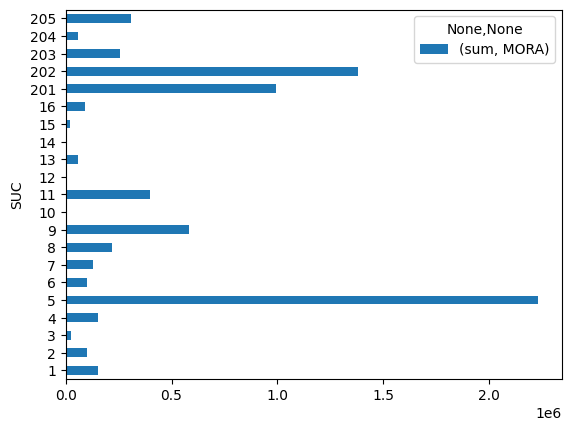

In [310]:
mora_sum.plot(kind='barh')

In [311]:
mora_count= credito.pivot_table(index=['SUC'], values='MORA', aggfunc=['count'], sort=True, margins=True )
mora_count

,count
,MORA
SUC,
1,126
2,746
3,327
4,1017
5,528
6,715
7,896
8,976


In [312]:
credito.shape

(10111, 27)

<Axes: ylabel='SUC'>

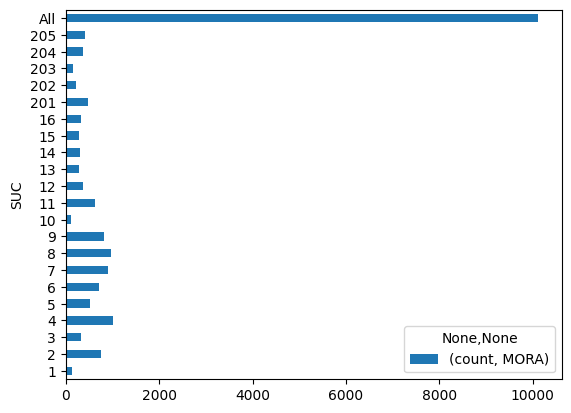

In [313]:
mora_count.plot(kind='barh')

In [314]:
mora_count.query('SUC <11')

TypeError: '<' not supported between instances of 'str' and 'int'

In [ ]:
df = pd.read_excel("./sales-funnel.xlsx")
df.head()

,Account,Name,Rep,Manager,Product,Quantity,Price,Status
0,714466,Trantow-Barrows,Craig Booker,Debra Henley,CPU,1,30000,presented
1,714466,Trantow-Barrows,Craig Booker,Debra Henley,Software,1,10000,presented
2,714466,Trantow-Barrows,Craig Booker,Debra Henley,Maintenance,2,5000,pending
3,737550,"Fritsch, Russel and Anderson",Craig Booker,Debra Henley,CPU,1,35000,declined
4,146832,Kiehn-Spinka,Daniel Hilton,Debra Henley,CPU,2,65000,won


In [ ]:
df.pivot_table(index=['Manager', 'Rep'], values=['Quantity', 'Price'], aggfunc=['sum', 'count', 'mean' ])

sum          count                   mean  \
                              Price Quantity Price Quantity         Price   
Manager       Rep                                                           
Debra Henley  Craig Booker    80000        5     4        4  20000.000000   
              Daniel Hilton  115000        5     3        3  38333.333333   
              John Smith      40000        3     2        2  20000.000000   
Fred Anderson Cedric Moss    110000        5     4        4  27500.000000   
              Wendy Yule     177000       12     4        4  44250.000000   

                                       
                             Quantity  
Manager       Rep                      
Debra Henley  Craig Booker   1.250000  
              Daniel Hilton  1.666667  
              John Smith     1.500000  
Fred Anderson Cedric Moss    1.250000  
              Wendy Yule     3.000000

In [ ]:
df.pivot_table(index=['Manager', 'Rep'], values=['Quantity', 'Price'], aggfunc=['sum'])

sum         
                              Price Quantity
Manager       Rep                           
Debra Henley  Craig Booker    80000        5
              Daniel Hilton  115000        5
              John Smith      40000        3
Fred Anderson Cedric Moss    110000        5
              Wendy Yule     177000       12

In [ ]:
df.pivot_table(index=['Rep'], columns='Manager', values=['Quantity', 'Price'], aggfunc=['sum'])

sum                                         
                     Price                   Quantity              
Manager       Debra Henley Fred Anderson Debra Henley Fred Anderson
Rep                                                                
Cedric Moss            NaN      110000.0          NaN           5.0
Craig Booker       80000.0           NaN          5.0           NaN
Daniel Hilton     115000.0           NaN          5.0           NaN
John Smith         40000.0           NaN          3.0           NaN
Wendy Yule             NaN      177000.0          NaN          12.0

In [ ]:
pd.pivot_table(df,index=["Manager","Rep"],values=["Price"],
               columns=["Product"],aggfunc=[np.sum])

sum                             
                                Price                             
Product                           CPU Maintenance Monitor Software
Manager       Rep                                                 
Debra Henley  Craig Booker    65000.0      5000.0     NaN  10000.0
              Daniel Hilton  105000.0         NaN     NaN  10000.0
              John Smith      35000.0      5000.0     NaN      NaN
Fred Anderson Cedric Moss     95000.0      5000.0     NaN  10000.0
              Wendy Yule     165000.0      7000.0  5000.0      NaN

<Axes: ylabel='Manager,Rep'>

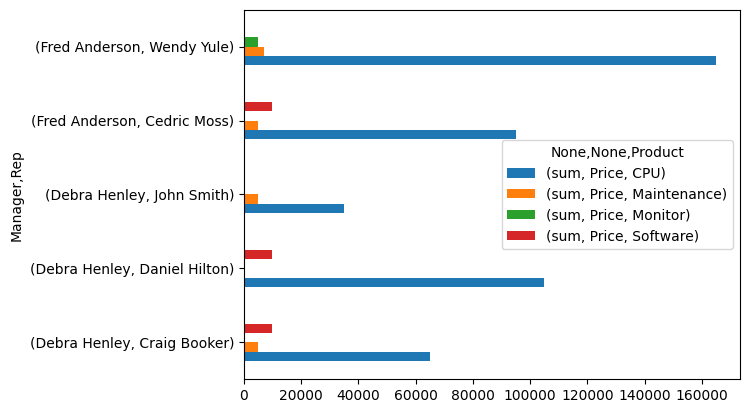

In [ ]:
pd.pivot_table(df,index=["Manager","Rep"],values=["Price"],
               columns=["Product"],aggfunc=[np.sum],fill_value=0).plot(kind='barh')

In [ ]:
pd.pivot_table(df,index=["Manager","Rep","Product"],
               values=["Price","Quantity"],
               aggfunc=[np.sum,np.mean],fill_value=0,margins=True)

sum                   mean  \
                                          Price Quantity         Price   
Manager       Rep           Product                                      
Debra Henley  Craig Booker  CPU           65000        2  32500.000000   
                            Maintenance    5000        2   5000.000000   
                            Software      10000        1  10000.000000   
              Daniel Hilton CPU          105000        4  52500.000000   
                            Software      10000        1  10000.000000   
              John Smith    CPU           35000        1  35000.000000   
                            Maintenance    5000        2   5000.000000   
Fred Anderson Cedric Moss   CPU           95000        3  47500.000000   
                            Maintenance    5000        1   5000.000000   
                            Software      10000        1  10000.000000   
              Wendy Yule    CPU          165000        7  82500.000000   
                            Maintenance    7000        3   7000.000000   
                            Monitor        5000        2   5000.000000   
All                                      522000       30  30705.882353   

                                                   
                                         Quantity  
Manager       Rep           Product                
Debra Henley  Craig Booker  CPU          1.000000  
                            Maintenance  2.000000  
                            Software     1.000000  
              Daniel Hilton CPU          2.000000  
                            Software     1.000000  
              John Smith    CPU          1.000000  
                            Maintenance  2.000000  
Fred Anderson Cedric Moss   CPU          1.500000  
                            Maintenance  1.000000  
                            Software     1.000000  
              Wendy Yule    CPU          3.500000  
                            Maintenance  3.000000  
                            Monitor      2.000000  
All                                      1.764706

In [ ]:
pd.pivot_table(df,index=["Manager","Status"],values=["Price"],
               aggfunc=[np.sum],fill_value=0,margins=True)

sum
                          Price
Manager       Status           
Debra Henley  declined    70000
              pending     50000
              presented   50000
              won         65000
Fred Anderson declined    65000
              pending      5000
              presented   45000
              won        172000
All                      522000

In [ ]:
table = pd.pivot_table(df,index=["Manager","Status"],columns=["Product"],values=["Quantity","Price"],
               aggfunc={"Quantity":len,"Price":[np.sum,np.mean]},fill_value=0)
table

Price                                       \
                          mean                                  sum   
Product                    CPU Maintenance Monitor Software     CPU   
Manager       Status                                                  
Debra Henley  declined   35000           0       0        0   70000   
              pending    40000        5000       0        0   40000   
              presented  30000           0       0    10000   30000   
              won        65000           0       0        0   65000   
Fred Anderson declined   65000           0       0        0   65000   
              pending        0        5000       0        0       0   
              presented  30000           0    5000    10000   30000   
              won        82500        7000       0        0  165000   

                                                     Quantity              \
                                                          len               
Product                 Maintenance Monitor Software      CPU Maintenance   
Manager       Status                                                        
Debra Henley  declined            0       0        0        2           0   
              pending         10000       0        0        1           2   
              presented           0       0    20000        1           0   
              won                 0       0        0        1           0   
Fred Anderson declined            0       0        0        1           0   
              pending          5000       0        0        0           1   
              presented           0    5000    10000        1           0   
              won              7000       0        0        2           1   

                                          
                                          
Product                 Monitor Software  
Manager       Status                      
Debra Henley  declined        0        0  
              pending         0        0  
              presented       0        2  
              won             0        0  
Fred Anderson declined        0        0  
              pending         0        0  
              presented       1        1  
              won             0        0

In [ ]:
table.query('Manager == ["Debra Henley"]')

Price                                                  \
                         mean                                 sum               
Product                   CPU Maintenance Monitor Software    CPU Maintenance   
Manager      Status                                                             
Debra Henley declined   35000           0       0        0  70000           0   
             pending    40000        5000       0        0  40000       10000   
             presented  30000           0       0    10000  30000           0   
             won        65000           0       0        0  65000           0   

                                        Quantity                               
                                             len                               
Product                Monitor Software      CPU Maintenance Monitor Software  
Manager      Status                                                            
Debra Henley declined        0        0        2           0       0        0  
             pending         0        0        1           2       0        0  
             presented       0    20000        1           0       0        2  
             won             0        0        1           0       0        0

In [ ]:
table.query('Status == ["pending","won"]')

Price                                                   \
                        mean                                  sum               
Product                  CPU Maintenance Monitor Software     CPU Maintenance   
Manager       Status                                                            
Debra Henley  pending  40000        5000       0        0   40000       10000   
              won      65000           0       0        0   65000           0   
Fred Anderson pending      0        5000       0        0       0        5000   
              won      82500        7000       0        0  165000        7000   

                                       Quantity                               
                                            len                               
Product               Monitor Software      CPU Maintenance Monitor Software  
Manager       Status                                                          
Debra Henley  pending       0        0        1           2       0        0  
              won           0        0        1           0       0        0  
Fred Anderson pending       0        0        0           1       0        0  
              won           0        0        2           1       0        0

In [ ]:
credito.sample(3)

,SUC,SOCIO,NOMBRE_DEL_SOCIO,F. NACIMIENTO,SEXO,NOMBRE_ESTADO,NOMBRE_MUNICIPIO,NOMBRE_COLONIA,NOMBRE_LOCALIDAD,POBLACION,...,C VENCIDO,SCAPITAL,D. VEN,D X VEN,INTERES,MORA,DESCRIPCION PRODUCTO,NOMBRE PROMOTOR,CRED,DESTINO
4723,8,"1,516",ROSALIA PEREZ MERAZ,23/05/1969,F,SAN LUIS POTOSI,TAMAZUNCHALE,CHAPULHUACANITO,CHAPULHUACANITO,"3,445",...,0.00,20832.98,0,18,388.88,0.0,CREDITO NEGOCIO SOLIDARIO,EDUARDO HERNANDEZ HERNANDEZ,"4,654",COMPRA DE MERCANCIA
7360,13,"2,981",MARICELA LARES CORNELIO,02/08/1987,F,PUEBLA,TLACUILOTEPEC,TLACUILOTEPEC,TLACUILOTEPEC,"1,685",...,0.00,5941.07,0,20,69.31,0.0,CREDITO NEGOCIO,EUSEBIO ACOSTA BALTAZAR,"2,573",GASTOS VINCULADOS AL GANADO
468,2,"1,929",CRISTINA REYES DOMINGUEZ,24/07/1992,F,PUEBLA,PAHUATLAN,ATLA,ATLA,"2,172",...,0.00,11570.00,0,25,80.99,0.0,CREDITO NEGOCIO,SAUL CASTILLO VARGAS,"2,447",COMPRA INSUMOS


In [ ]:
estado_grp = credito.groupby(['NOMBRE_ESTADO'])
estado_grp.count()

,SUC,SOCIO,NOMBRE_DEL_SOCIO,F. NACIMIENTO,SEXO,NOMBRE_MUNICIPIO,NOMBRE_COLONIA,NOMBRE_LOCALIDAD,POBLACION,F. EMISION,...,C VENCIDO,SCAPITAL,D. VEN,D X VEN,INTERES,MORA,DESCRIPCION PRODUCTO,NOMBRE PROMOTOR,CRED,DESTINO
NOMBRE_ESTADO,,,,,,,,,,,,,,,,,,,,,
BAJA CALIFORNIA,277,277,277,277,277,277,277,277,270,277,...,277,277,277,277,277,277,277,277,277,277
BAJA CALIFORNIA SUR,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
DISTRITO FEDERAL,4,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4
GUERRERO,27,27,27,27,27,27,27,27,27,27,...,27,27,27,27,27,27,27,27,27,27
HIDALGO,1931,1931,1931,1931,1931,1931,1931,1931,1931,1931,...,1931,1931,1931,1931,1931,1931,1931,1931,1931,1931
MEXICO,6,6,6,6,6,6,6,6,6,6,...,6,6,6,6,6,6,6,6,6,6
MORELOS,83,83,83,83,83,83,83,83,83,83,...,83,83,83,83,83,83,83,83,83,83
OAXACA,1632,1632,1632,1632,1632,1632,1632,1632,1602,1632,...,1632,1632,1632,1632,1632,1632,1632,1632,1632,1632
PUEBLA,5467,5467,5467,5467,5467,5467,5467,5467,5464,5467,...,5467,5467,5467,5467,5467,5467,5467,5467,5467,5467


In [ ]:
eg = estado_grp['SEXO'].value_counts()
eg


NOMBRE_ESTADO                    SEXO
BAJA CALIFORNIA                  F        181
                                 M         96
BAJA CALIFORNIA SUR              M          1
DISTRITO FEDERAL                 F          3
                                 M          1
GUERRERO                         F         22
                                 M          5
HIDALGO                          F       1354
                                 M        577
MEXICO                           F          4
                                 M          2
MORELOS                          M         59
                                 F         24
OAXACA                           F       1164
                                 M        468
PUEBLA                           F       3527
                                 M       1940
SAN LUIS POTOSI                  F        125
                                 M         52
VERACRUZ DE IGNACIO DE LA LLAVE  F        367
                                 M        

In [ ]:
eg2= pd.DataFrame(eg)
eg2

SEXO
NOMBRE_ESTADO                   SEXO      
BAJA CALIFORNIA                 F      181
                                M       96
BAJA CALIFORNIA SUR             M        1
DISTRITO FEDERAL                F        3
                                M        1
GUERRERO                        F       22
                                M        5
HIDALGO                         F     1354
                                M      577
MEXICO                          F        4
                                M        2
MORELOS                         M       59
                                F       24
OAXACA                          F     1164
                                M      468
PUEBLA                          F     3527
                                M     1940
SAN LUIS POTOSI                 F      125
                                M       52
VERACRUZ DE IGNACIO DE LA LLAVE F      367
                                M      139

In [ ]:
eg2.columns

Index(['SEXO'], dtype='object')

In [ ]:
eg2 = eg2.rename(columns={'SEXO':'NUM'})
eg2

NUM
NOMBRE_ESTADO                   SEXO      
BAJA CALIFORNIA                 F      181
                                M       96
BAJA CALIFORNIA SUR             M        1
DISTRITO FEDERAL                F        3
                                M        1
GUERRERO                        F       22
                                M        5
HIDALGO                         F     1354
                                M      577
MEXICO                          F        4
                                M        2
MORELOS                         M       59
                                F       24
OAXACA                          F     1164
                                M      468
PUEBLA                          F     3527
                                M     1940
SAN LUIS POTOSI                 F      125
                                M       52
VERACRUZ DE IGNACIO DE LA LLAVE F      367
                                M      139

<Axes: ylabel='NOMBRE_ESTADO,SEXO'>

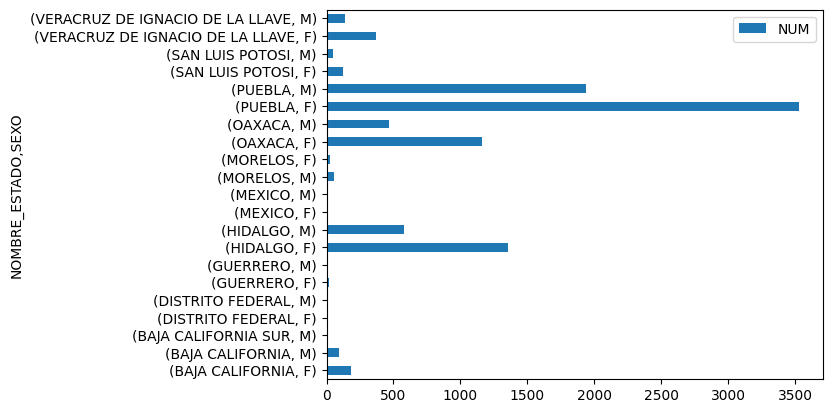

In [ ]:
eg2.plot(kind='barh')

In [ ]:
eg2.reset_index(inplace=True)

In [ ]:
eg2.columns

Index(['NOMBRE_ESTADO', 'SEXO', 'NUM'], dtype='object')

In [ ]:
eg2

,NOMBRE_ESTADO,SEXO,NUM
0,BAJA CALIFORNIA,F,181
1,BAJA CALIFORNIA,M,96
2,BAJA CALIFORNIA SUR,M,1
3,DISTRITO FEDERAL,F,3
4,DISTRITO FEDERAL,M,1
5,GUERRERO,F,22
6,GUERRERO,M,5
7,HIDALGO,F,1354
8,HIDALGO,M,577
9,MEXICO,F,4


In [ ]:
eg3 = eg2.pivot_table(index='NOMBRE_ESTADO', columns='SEXO', values='NUM', fill_value=0)
eg3

SEXO,F,M
NOMBRE_ESTADO,,
BAJA CALIFORNIA,181,96
BAJA CALIFORNIA SUR,0,1
DISTRITO FEDERAL,3,1
GUERRERO,22,5
HIDALGO,1354,577
MEXICO,4,2
MORELOS,24,59
OAXACA,1164,468
PUEBLA,3527,1940


<Axes: ylabel='NOMBRE_ESTADO'>

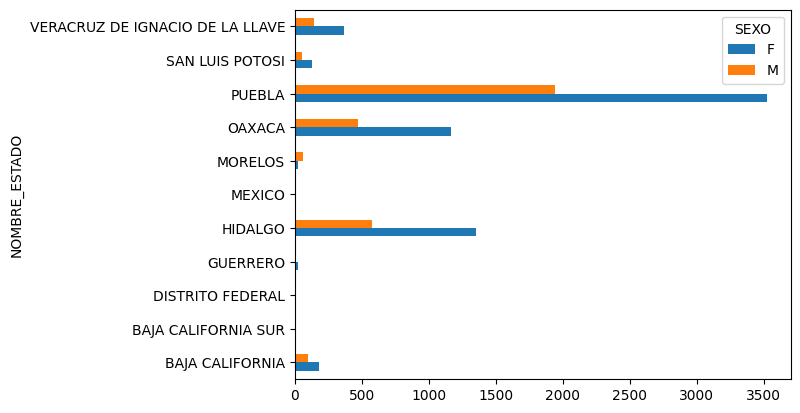

In [ ]:
eg3.plot(kind='barh')

In [ ]:
sex = credito.pivot_table(index='NOMBRE_ESTADO', columns='SEXO', aggfunc='count', fill_value=0)
sex

C VENCIDO       C VIGENTE        CRED        \
SEXO                                    F     M         F     M     F     M   
NOMBRE_ESTADO                                                                 
BAJA CALIFORNIA                       181    96       181    96   181    96   
BAJA CALIFORNIA SUR                     0     1         0     1     0     1   
DISTRITO FEDERAL                        3     1         3     1     3     1   
GUERRERO                               22     5        22     5    22     5   
HIDALGO                              1354   577      1354   577  1354   577   
MEXICO                                  4     2         4     2     4     2   
MORELOS                                24    59        24    59    24    59   
OAXACA                               1164   468      1164   468  1164   468   
PUEBLA                               3527  1940      3527  1940  3527  1940   
SAN LUIS POTOSI                       125    52       125    52   125    52   
VERACRUZ DE IGNACIO DE LA LLAVE       367   139       367   139   367   139   

                                D X VEN       D. VEN        ... POBLACION  \
SEXO                                  F     M      F     M  ...         F   
NOMBRE_ESTADO                                               ...             
BAJA CALIFORNIA                     181    96    181    96  ...       176   
BAJA CALIFORNIA SUR                   0     1      0     1  ...         0   
DISTRITO FEDERAL                      3     1      3     1  ...         3   
GUERRERO                             22     5     22     5  ...        22   
HIDALGO                            1354   577   1354   577  ...      1354   
MEXICO                                4     2      4     2  ...         4   
MORELOS                              24    59     24    59  ...        24   
OAXACA                             1164   468   1164   468  ...      1139   
PUEBLA                             3527  1940   3527  1940  ...      3525   
SAN LUIS POTOSI                     125    52    125    52  ...       125   
VERACRUZ DE IGNACIO DE LA LLAVE     367   139    367   139  ...       367   

                                      SCAPITAL       SOCIO         SUC        \
SEXO                                M        F     M     F     M     F     M   
NOMBRE_ESTADO                                                                  
BAJA CALIFORNIA                    94      181    96   181    96   181    96   
BAJA CALIFORNIA SUR                 1        0     1     0     1     0     1   
DISTRITO FEDERAL                    1        3     1     3     1     3     1   
GUERRERO                            5       22     5    22     5    22     5   
HIDALGO                           577     1354   577  1354   577  1354   577   
MEXICO                              2        4     2     4     2     4     2   
MORELOS                            59       24    59    24    59    24    59   
OAXACA                            463     1164   468  1164   468  1164   468   
PUEBLA                           1939     3527  1940  3527  1940  3527  1940   
SAN LUIS POTOSI                    52      125    52   125    52   125    52   
VERACRUZ DE IGNACIO DE LA LLAVE   139      367   139   367   139   367   139   

                                T. INT        
SEXO                                 F     M  
NOMBRE_ESTADO                                 
BAJA CALIFORNIA                    181    96  
BAJA CALIFORNIA SUR                  0     1  
DISTRITO FEDERAL                     3     1  
GUERRERO                            22     5  
HIDALGO                           1354   577  
MEXICO                               4     2  
MORELOS                             24    59  
OAXACA                            1164   468  
PUEBLA                            3527  1940  
SAN LUIS POTOSI                    125    52  
VERACRUZ DE IGNACIO DE LA LLAVE    367   139  

[11 rows x 50 columns]

In [ ]:
sex['CRED'].sort_values('F', ascending=False)

SEXO,F,M
NOMBRE_ESTADO,,
PUEBLA,3527,1940
HIDALGO,1354,577
OAXACA,1164,468
VERACRUZ DE IGNACIO DE LA LLAVE,367,139
BAJA CALIFORNIA,181,96
SAN LUIS POTOSI,125,52
MORELOS,24,59
GUERRERO,22,5
MEXICO,4,2


In [316]:
sex = credito.pivot_table(index='NOMBRE_ESTADO', columns='SEXO', aggfunc='sum', fill_value=0)
sex

C:\Users\Usuario Innova\AppData\Local\Temp\ipykernel_14364\588634928.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sex = credito.pivot_table(index='NOMBRE_ESTADO', columns='SEXO', aggfunc='sum', fill_value=0)


D X VEN         D. VEN         F. PAG         \
SEXO                                  F      M       F      M       F      M   
NOMBRE_ESTADO                                                                  
BAJA CALIFORNIA                    2706   1549     920    517    5430   3720   
BAJA CALIFORNIA SUR                   0     18       0      0       0     30   
DISTRITO FEDERAL                     62    126     695      0      45    360   
GUERRERO                           2589    580       0      0    7830   1800   
HIDALGO                           24963  12353   35085   7649   41596  20030   
MEXICO                              161    126     194    349     177    375   
MORELOS                            4192  12051       0      0    7860  20520   
OAXACA                            21430  15729  242948  38946   40748  28913   
PUEBLA                            67780  48315   79452  53338  123737  89239   
SAN LUIS POTOSI                    2213   1289     878      0    3652   2475   
VERACRUZ DE IGNACIO DE LA LLAVE    6824   2785    1095   1975   10701   5645   

                                       MORA             N. PAG         \
SEXO                                      F           M      F      M   
NOMBRE_ESTADO                                                           
BAJA CALIFORNIA                    13439.59     7658.40   2142   1097   
BAJA CALIFORNIA SUR                    0.00        0.00      0     12   
DISTRITO FEDERAL                    3949.75        0.00     72      1   
GUERRERO                               0.00        0.00     22      5   
HIDALGO                           631066.24   188106.37  17586   7841   
MEXICO                              2646.70     2933.58     49     25   
MORELOS                                0.00        0.00     35     59   
OAXACA                           2374333.81   627825.23  17265   6501   
PUEBLA                           1804223.51  1393979.83  44802  24601   
SAN LUIS POTOSI                    22395.00        0.00   1324    635   
VERACRUZ DE IGNACIO DE LA LLAVE    34495.59   161568.02   4412   1703   

                                    SCAPITAL                  SUC         \
SEXO                                       F            M       F      M   
NOMBRE_ESTADO                                                              
BAJA CALIFORNIA                   2706221.22   2415162.11    2715   1440   
BAJA CALIFORNIA SUR                     0.00      8262.64       0     14   
DISTRITO FEDERAL                    48347.27    100000.00       3      1   
GUERRERO                          1025000.00    225000.00      22      5   
HIDALGO                          16225062.02   7488354.78   13348   5530   
MEXICO                              76273.29     60182.18      11      2   
MORELOS                           1487833.33   5083000.00      24     59   
OAXACA                           16879846.97   9109986.17  236243  95073   
PUEBLA                           39372446.35  24994355.38   22489  12574   
SAN LUIS POTOSI                   1455212.28    627888.47    1000    416   
VERACRUZ DE IGNACIO DE LA LLAVE   4205134.67   1720077.96    4010   1472   

                                 T. INT         
SEXO                                  F      M  
NOMBRE_ESTADO                                   
BAJA CALIFORNIA                    7920   4092  
BAJA CALIFORNIA SUR                   0     36  
DISTRITO FEDERAL                     54     30  
GUERRERO                            660    150  
HIDALGO                           57462  23220  
MEXICO                              114     48  
MORELOS                             708   1770  
OAXACA                            50922  19326  
PUEBLA                           144792  77070  
SAN LUIS POTOSI                    5652   2208  
VERACRUZ DE IGNACIO DE LA LLAVE   16296   5874

In [ ]:
sex['SCAPITAL'].sort_values('F', ascending=False)

SEXO,F,M
NOMBRE_ESTADO,,
PUEBLA,39372446.35,24994355.38
OAXACA,16879846.97,9109986.17
HIDALGO,16225062.02,7488354.78
VERACRUZ DE IGNACIO DE LA LLAVE,4205134.67,1720077.96
BAJA CALIFORNIA,2706221.22,2415162.11
MORELOS,1487833.33,5083000.00
SAN LUIS POTOSI,1455212.28,627888.47
GUERRERO,1025000.00,225000.00
MEXICO,76273.29,60182.18


In [ ]:
credito.columns

Index(['SUC', 'SOCIO', 'NOMBRE_DEL_SOCIO', 'F. NACIMIENTO', 'SEXO',
       'NOMBRE_ESTADO', 'NOMBRE_MUNICIPIO', 'NOMBRE_COLONIA',
       'NOMBRE_LOCALIDAD', 'POBLACION', 'F. EMISION', 'MONTO', 'F. VENCE',
       'T. INT', 'N. PAG', 'F. PAG', 'C VIGENTE', 'C VENCIDO', 'SCAPITAL',
       'D. VEN', 'D X VEN', 'INTERES', 'MORA', 'DESCRIPCION PRODUCTO',
       'NOMBRE PROMOTOR', 'CRED', 'DESTINO'],
      dtype='object')

In [317]:
credito['F. EMISION']= pd.to_datetime(credito['F. EMISION'], format='%d/%m/%Y' )

In [318]:
credito.loc[0,'F. EMISION'].day_name()

'Thursday'

In [319]:
creds_x_año=credito.pivot_table(index=pd.Grouper(freq='M', key='F. EMISION'), columns='NOMBRE_ESTADO', values='CRED', aggfunc='count', fill_value=0)
creds_x_año

NOMBRE_ESTADO,BAJA CALIFORNIA,BAJA CALIFORNIA SUR,DISTRITO FEDERAL,GUERRERO,HIDALGO,MEXICO,MORELOS,OAXACA,PUEBLA,SAN LUIS POTOSI,VERACRUZ DE IGNACIO DE LA LLAVE
F. EMISION,,,,,,,,,,,
2016-09-30,0,0,0,0,0,0,0,1,0,0,0
2016-10-31,0,0,0,0,0,0,0,1,0,0,0
2016-11-30,0,0,0,0,0,0,0,1,0,0,0
2016-12-31,0,0,0,0,0,0,0,2,0,0,0
2017-03-31,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
2022-08-31,33,0,0,1,148,1,17,137,481,13,40
2022-09-30,28,0,1,0,171,0,22,115,491,14,77
2022-10-31,14,1,1,0,171,0,2,187,460,20,100


In [320]:
creds_x_año['2022']

C:\Users\Usuario Innova\AppData\Local\Temp\ipykernel_14364\3059955665.py:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  creds_x_año['2022']


NOMBRE_ESTADO,BAJA CALIFORNIA,BAJA CALIFORNIA SUR,DISTRITO FEDERAL,GUERRERO,HIDALGO,MEXICO,MORELOS,OAXACA,PUEBLA,SAN LUIS POTOSI,VERACRUZ DE IGNACIO DE LA LLAVE
F. EMISION,,,,,,,,,,,
2022-01-31,4,0,0,0,76,0,0,54,276,5,7
2022-02-28,16,0,0,0,91,0,0,53,299,3,22
2022-03-31,13,0,0,0,113,0,0,62,405,6,16
2022-04-30,24,0,0,26,144,0,3,80,414,8,22
2022-05-31,30,0,1,0,175,1,21,65,488,5,21
2022-06-30,36,0,0,0,153,0,13,105,468,7,32
2022-07-31,21,0,0,0,109,0,0,87,393,18,26
2022-08-31,33,0,0,1,148,1,17,137,481,13,40
2022-09-30,28,0,1,0,171,0,22,115,491,14,77


C:\Users\Usuario Innova\AppData\Local\Temp\ipykernel_14364\2806237202.py:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  creds_x_año['2022'].plot(kind='barh')


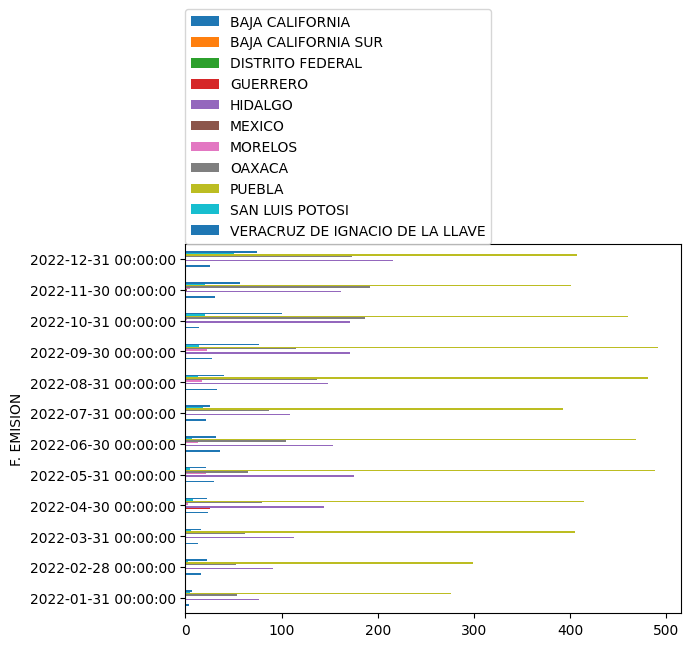

In [321]:
creds_x_año['2022'].plot(kind='barh')
plt.legend(loc=(0, 1))

In [322]:
creds_x_año2=credito.pivot_table(index=pd.Grouper(freq='Y', key='F. EMISION'), columns='NOMBRE_ESTADO', values='CRED', aggfunc='count', fill_value=0)
creds_x_año2

NOMBRE_ESTADO,BAJA CALIFORNIA,BAJA CALIFORNIA SUR,DISTRITO FEDERAL,GUERRERO,HIDALGO,MEXICO,MORELOS,OAXACA,PUEBLA,SAN LUIS POTOSI,VERACRUZ DE IGNACIO DE LA LLAVE
F. EMISION,,,,,,,,,,,
2016-12-31,0,0,0,0,0,0,0,5,0,0,0
2017-12-31,0,0,0,0,0,0,0,74,0,0,0
2018-12-31,0,0,0,0,3,0,0,51,32,0,0
2019-12-31,0,0,0,0,2,0,0,15,24,0,0
2020-12-31,0,0,1,0,18,0,0,23,21,0,5
2021-12-31,1,0,0,0,179,2,0,154,407,8,7
2022-12-31,276,1,3,27,1729,4,83,1310,4983,169,494


In [323]:
creds_x_año3=credito.pivot_table(index=pd.Grouper(freq='Y', key='F. EMISION'), columns='NOMBRE_ESTADO', values='SCAPITAL', aggfunc='sum', fill_value=0)
creds_x_año3

NOMBRE_ESTADO,BAJA CALIFORNIA,BAJA CALIFORNIA SUR,DISTRITO FEDERAL,GUERRERO,HIDALGO,MEXICO,MORELOS,OAXACA,PUEBLA,SAN LUIS POTOSI,VERACRUZ DE IGNACIO DE LA LLAVE
F. EMISION,,,,,,,,,,,
2016-12-31,0.00,0.00,0.00,0,0.00,0.00,0.00,33651.60,0.00,0.00,0.00
2017-12-31,0.00,0.00,0.00,0,0.00,0.00,0.00,245584.14,0.00,0.00,0.00
2018-12-31,0.00,0.00,0.00,0,35042.29,0.00,0.00,195017.79,407228.68,0.00,0.00
2019-12-31,0.00,0.00,0.00,0,21244.89,0.00,0.00,106256.29,188696.55,0.00,0.00
2020-12-31,0.00,0.00,6318.29,0,203108.56,0.00,0.00,151136.67,268170.79,0.00,245272.02
2021-12-31,6496.67,0.00,0.00,0,1504468.78,17201.81,0.00,1584949.28,3401705.08,61619.28,65368.44
2022-12-31,5114886.66,8262.64,142028.98,1250000,21949552.28,119253.66,6570833.33,23673237.37,60101000.63,2021481.47,5614572.17


In [324]:
creds_x_año4=credito.pivot_table(index=pd.Grouper(freq='Y', key='F. EMISION'), columns='NOMBRE_ESTADO', values='MORA', aggfunc='sum',  fill_value=0 )
creds_x_año4

NOMBRE_ESTADO,BAJA CALIFORNIA,BAJA CALIFORNIA SUR,DISTRITO FEDERAL,GUERRERO,HIDALGO,MEXICO,MORELOS,OAXACA,PUEBLA,SAN LUIS POTOSI,VERACRUZ DE IGNACIO DE LA LLAVE
F. EMISION,,,,,,,,,,,
2016-12-31,0.00,0,0.00,0,0.00,0.00,0,147312.38,0.00,0.00,0.00
2017-12-31,0.00,0,0.00,0,0.00,0.00,0,1068623.74,0.00,0.00,0.00
2018-12-31,0.00,0,0.00,0,48335.14,0.00,0,808121.73,637346.78,0.00,0.00
2019-12-31,0.00,0,0.00,0,53677.42,0.00,0,254915.86,447692.75,0.00,0.00
2020-12-31,0.00,0,3949.75,0,311721.15,0.00,0,264613.24,361940.17,0.00,180305.92
2021-12-31,0.00,0,0.00,0,362438.18,5580.28,0,398215.88,1054267.87,15872.32,15715.34
2022-12-31,21097.99,0,0.00,0,43000.72,0.00,0,60356.21,696955.77,6522.68,42.35


In [ ]:
credito.columns

Index(['SUC', 'SOCIO', 'NOMBRE_DEL_SOCIO', 'F. NACIMIENTO', 'SEXO',
       'NOMBRE_ESTADO', 'NOMBRE_MUNICIPIO', 'NOMBRE_COLONIA',
       'NOMBRE_LOCALIDAD', 'POBLACION', 'F. EMISION', 'MONTO', 'F. VENCE',
       'T. INT', 'N. PAG', 'F. PAG', 'C VIGENTE', 'C VENCIDO', 'SCAPITAL',
       'D. VEN', 'D X VEN', 'INTERES', 'MORA', 'DESCRIPCION PRODUCTO',
       'NOMBRE PROMOTOR', 'CRED', 'DESTINO'],
      dtype='object')

In [325]:
creds_x_año5=credito.pivot_table(index=pd.Grouper(freq='Y', key='F. EMISION'), columns='SUC', values='CRED', aggfunc='count',  fill_value=0 )
creds_x_año5

SUC,1,2,3,4,5,6,7,8,9,10,...,12,13,14,15,16,201,202,203,204,205
F. EMISION,,,,,,,,,,,,,,,,,,,,,
2016-12-31,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,5,0,0,0,0
2017-12-31,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,10,62,2,0,0
2018-12-31,0,12,0,10,7,0,2,1,2,0,...,0,1,0,0,0,10,34,6,1,0
2019-12-31,0,1,1,1,15,2,1,1,0,0,...,0,0,0,0,1,6,2,2,2,3
2020-12-31,4,1,1,3,2,1,0,5,14,0,...,0,0,0,0,1,10,6,0,0,7
2021-12-31,1,19,1,63,173,54,57,74,109,8,...,3,7,4,1,5,47,12,9,19,67
2022-12-31,121,713,324,940,331,658,836,895,704,106,...,375,275,296,276,323,385,109,139,339,338


In [326]:
creds_x_año5=credito.pivot_table(index=pd.Grouper(freq='Y', key='F. EMISION'), columns='NOMBRE_ESTADO', values='MORA', aggfunc='mean',  fill_value=0 )
creds_x_año5

NOMBRE_ESTADO,BAJA CALIFORNIA,BAJA CALIFORNIA SUR,DISTRITO FEDERAL,GUERRERO,HIDALGO,MEXICO,MORELOS,OAXACA,PUEBLA,SAN LUIS POTOSI,VERACRUZ DE IGNACIO DE LA LLAVE
F. EMISION,,,,,,,,,,,
2016-12-31,0.000000,0,0.00,0,0.000000,0.00,0,29462.476000,0.000000,0.00000,0.000000
2017-12-31,0.000000,0,0.00,0,0.000000,0.00,0,14440.861351,0.000000,0.00000,0.000000
2018-12-31,0.000000,0,0.00,0,16111.713333,0.00,0,15845.524118,19917.086875,0.00000,0.000000
2019-12-31,0.000000,0,0.00,0,26838.710000,0.00,0,16994.390667,18653.864583,0.00000,0.000000
2020-12-31,0.000000,0,3949.75,0,17317.841667,0.00,0,11504.923478,17235.246190,0.00000,36061.184000
2021-12-31,0.000000,0,0.00,0,2024.794302,2790.14,0,2585.817403,2590.338747,1984.04000,2245.048571
2022-12-31,76.441993,0,0.00,0,24.870283,0.00,0,46.073443,139.866701,38.59574,0.085729


In [327]:
creds_x_año5=credito.pivot_table(index=pd.Grouper(freq='Y', key='F. EMISION'), columns='NOMBRE_ESTADO', values='D. VEN', aggfunc='mean',  fill_value=0 )
creds_x_año5

NOMBRE_ESTADO,BAJA CALIFORNIA,BAJA CALIFORNIA SUR,DISTRITO FEDERAL,GUERRERO,HIDALGO,MEXICO,MORELOS,OAXACA,PUEBLA,SAN LUIS POTOSI,VERACRUZ DE IGNACIO DE LA LLAVE
F. EMISION,,,,,,,,,,,
2016-12-31,0.000000,0,0,0,0.000000,0.0,0,2046.600000,0.000000,0.000000,0.000000
2017-12-31,0.000000,0,0,0,0.000000,0.0,0,1789.891892,0.000000,0.000000,0.000000
2018-12-31,0.000000,0,0,0,509.333333,0.0,0,1648.647059,582.562500,0.000000,0.000000
2019-12-31,0.000000,0,0,0,1178.500000,0.0,0,1118.066667,1023.958333,0.000000,0.000000
2020-12-31,0.000000,0,695,0,684.777778,0.0,0,790.608696,684.095238,0.000000,520.000000
2021-12-31,0.000000,0,0,0,122.497207,271.5,0,98.376623,115.941032,48.250000,65.428571
2022-12-31,5.206522,0,0,0,2.658184,0.0,0,3.834351,5.622918,2.911243,0.024291


In [ ]:
df = credito[['NOMBRE_ESTADO','SEXO', 'CRED']]
df

,NOMBRE_ESTADO,SEXO,CRED
0,MORELOS,F,312
1,DISTRITO FEDERAL,F,302
2,DISTRITO FEDERAL,F,301
3,PUEBLA,M,175
4,MEXICO,M,95
...,...,...,...
10106,OAXACA,F,"2,590"
10107,OAXACA,F,"2,592"
10108,OAXACA,F,"2,594"
10109,OAXACA,F,"2,596"


In [331]:
creds_x_año6=credito.pivot_table(index=pd.Grouper(freq='Y', key='F. EMISION'), columns='DESCRIPCION PRODUCTO', values='CRED', aggfunc='count',  fill_value=0 )
creds_x_año6

DESCRIPCION PRODUCTO,CREDITO AGROPECUARIO INDIVIDUAL,CREDITO AGROPECUARIO SOLIDARIO,CREDITO COLABORADORES,CREDITO DE CONSUMO,CREDITO EMPRENDEDOR Y MICROEMPRESARIAL,CREDITO EMPRESARIAL,CREDITO GARANTIZADO SOBRE INVERSION,CREDITO MEJORA LA CASA,CREDITO MI CASA AUTOPRODUCCION,CREDITO MI CASA AUTOPRODUCCION PROTOTIPO,CREDITO MI CASA MEJORAMIENTO,CREDITO NEGOCIO,CREDITO NEGOCIO SOLIDARIO,CREDITO PARA EMPLEADOS Y DIRECTIVOS,CREDITO PRODUCTIVO ESTRATEGICO 1
F. EMISION,,,,,,,,,,,,,,,
2016-12-31,0,0,0,0,0,0,0,1,0,0,0,4,0,0,0
2017-12-31,0,0,0,0,0,1,0,1,0,0,0,8,64,0,0
2018-12-31,0,0,0,0,4,0,0,1,19,1,3,10,48,0,0
2019-12-31,0,0,0,0,0,0,0,1,0,0,0,30,10,0,0
2020-12-31,1,4,1,3,0,0,0,5,1,0,0,17,36,0,0
2021-12-31,10,0,1,12,0,0,0,261,0,0,0,280,192,2,0
2022-12-31,188,56,28,267,0,0,30,2576,0,0,0,3550,2250,19,115


In [341]:
f = creds_x_año6.gt(100)
f

DESCRIPCION PRODUCTO,CREDITO AGROPECUARIO INDIVIDUAL,CREDITO AGROPECUARIO SOLIDARIO,CREDITO COLABORADORES,CREDITO DE CONSUMO,CREDITO EMPRENDEDOR Y MICROEMPRESARIAL,CREDITO EMPRESARIAL,CREDITO GARANTIZADO SOBRE INVERSION,CREDITO MEJORA LA CASA,CREDITO MI CASA AUTOPRODUCCION,CREDITO MI CASA AUTOPRODUCCION PROTOTIPO,CREDITO MI CASA MEJORAMIENTO,CREDITO NEGOCIO,CREDITO NEGOCIO SOLIDARIO,CREDITO PARA EMPLEADOS Y DIRECTIVOS,CREDITO PRODUCTIVO ESTRATEGICO 1
F. EMISION,,,,,,,,,,,,,,,
2016-12-31,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2017-12-31,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2018-12-31,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2019-12-31,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2020-12-31,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2021-12-31,False,False,False,False,False,False,False,True,False,False,False,True,True,False,False
2022-12-31,True,False,False,True,False,False,False,True,False,False,False,True,True,False,True


In [346]:
creds_x_año6 = creds_x_año6[f]
creds_x_año6

DESCRIPCION PRODUCTO,CREDITO AGROPECUARIO INDIVIDUAL,CREDITO AGROPECUARIO SOLIDARIO,CREDITO COLABORADORES,CREDITO DE CONSUMO,CREDITO EMPRENDEDOR Y MICROEMPRESARIAL,CREDITO EMPRESARIAL,CREDITO GARANTIZADO SOBRE INVERSION,CREDITO MEJORA LA CASA,CREDITO MI CASA AUTOPRODUCCION,CREDITO MI CASA AUTOPRODUCCION PROTOTIPO,CREDITO MI CASA MEJORAMIENTO,CREDITO NEGOCIO,CREDITO NEGOCIO SOLIDARIO,CREDITO PARA EMPLEADOS Y DIRECTIVOS,CREDITO PRODUCTIVO ESTRATEGICO 1
F. EMISION,,,,,,,,,,,,,,,
2016-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,261.0,NaN,NaN,NaN,280.0,192.0,NaN,NaN
2022-12-31,188.0,NaN,NaN,267.0,NaN,NaN,NaN,2576.0,NaN,NaN,NaN,3550.0,2250.0,NaN,115.0


C:\Users\Usuario Innova\AppData\Local\Temp\ipykernel_14364\1726335322.py:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  creds_x_año6['2022'].plot(kind='barh')


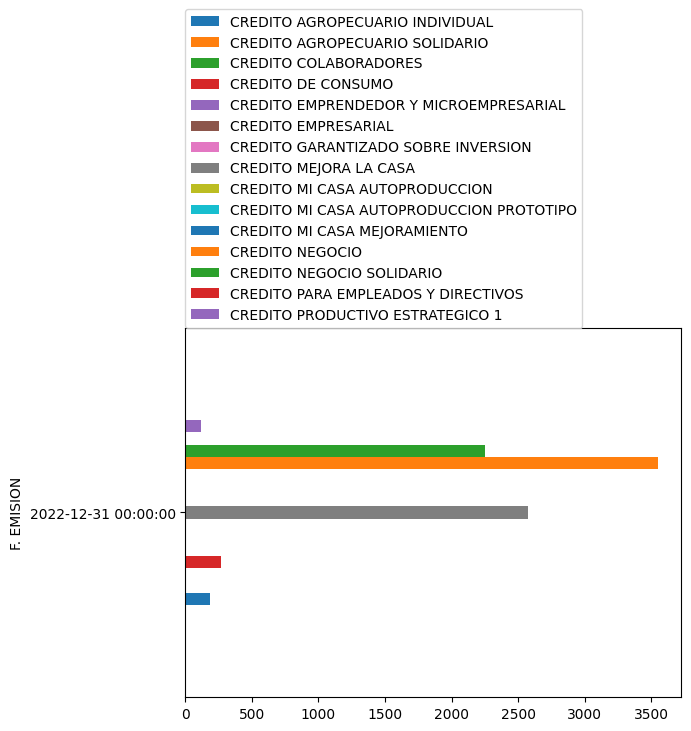

In [345]:
creds_x_año6['2022'].plot(kind='barh')
plt.legend(loc=(0, 1))